In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.|

In [3]:
data = pd.read_csv ("C:\\Users\\proti\\Downloads\\beijing_train.csv")
data.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [6]:
data.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,395301.000000,397554.000000,395000.000000,391917.000000,383515.000000,390769.000000,403512.000000,403511.000000,403507.000000,403515.000000,403538.000000
mean,16824.500000,2014.564194,6.735378,15.748217,11.500000,79.248275,104.327897,15.733060,50.352785,1214.843339,58.119327,14.088899,1010.282534,3.157291,0.067052,1.718380
std,9713.352953,1.097503,3.356479,8.808891,6.922195,79.146708,90.136400,21.739455,34.771910,1124.285676,57.375966,11.303534,10.356778,13.617273,0.837845,1.237965
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8412.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,2.000000,23.000000,500.000000,11.000000,4.000000,1002.000000,-8.000000,0.000000,0.900000
50%,16824.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,7.000000,43.000000,900.000000,45.000000,15.400000,1009.800000,4.200000,0.000000,1.400000
75%,25236.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,71.000000,1500.000000,83.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [ ]:
## Values of PM2.5, PM 10, SO2, NO2, CO, O3 are not normally distributed, hence we shall replace the missing values with median ##

In [7]:
data['PM2.5'].median()

55.0

In [66]:
data['PM2.5'].mode()

0    3.0
dtype: float64

In [67]:
data['PM2.5'].mode()[0]

3.0

In [8]:
data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].median())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    403776 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [10]:
data['PM10'] = data['PM10'].fillna(data['PM10'].median())

In [11]:
data['SO2'] = data['SO2'].fillna(data['SO2'].median())

In [12]:
data['NO2'] = data['NO2'].fillna(data['NO2'].median())

In [13]:
data['CO'] = data['CO'].fillna(data['CO'].median())

In [15]:
data['O3'] = data['O3'].fillna(data['O3'].median())

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    403776 non-null  float64
 6   PM10     403776 non-null  float64
 7   SO2      403776 non-null  float64
 8   NO2      403776 non-null  float64
 9   CO       403776 non-null  float64
 10  O3       403776 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [ ]:
## Using Interpolation to fill values for Temp,PRES, DEWP, RAIN as the forecast cannot be averged out. 

In [17]:
data['TEMP'].fillna('bfill')

0        -0.7
1        -1.1
2        -1.1
3        -1.4
4        -2.0
         ... 
403771   -1.9
403772   -2.5
403773   -3.0
403774   -3.0
403775   -4.0
Name: TEMP, Length: 403776, dtype: object

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   REF_NO  403776 non-null  int64  
 1   year    403776 non-null  int64  
 2   month   403776 non-null  int64  
 3   day     403776 non-null  int64  
 4   hour    403776 non-null  int64  
 5   PM2.5   403776 non-null  float64
 6   PM10    403776 non-null  float64
 7   SO2     403776 non-null  float64
 8   NO2     403776 non-null  float64
 9   CO      403776 non-null  float64
 10  O3      403776 non-null  float64
 11  TEMP    403776 non-null  float64
 12  PRES    403776 non-null  float64
 13  DEWP    403776 non-null  float64
 14  RAIN    403776 non-null  float64
 15  WSPM    403776 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 49.3 MB


In [18]:
data['TEMP'].interpolate(method='linear', direction = 'forward', inplace=True) 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    403776 non-null  float64
 6   PM10     403776 non-null  float64
 7   SO2      403776 non-null  float64
 8   NO2      403776 non-null  float64
 9   CO       403776 non-null  float64
 10  O3       403776 non-null  float64
 11  TEMP     403776 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [20]:
data['PRES'].interpolate(method='linear', direction = 'forward', inplace=True) 

In [21]:
data['RAIN'].interpolate(method='linear', direction = 'forward', inplace=True) 

In [22]:
data['WSPM'].interpolate(method='linear', direction = 'forward', inplace=True) 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    403776 non-null  float64
 6   PM10     403776 non-null  float64
 7   SO2      403776 non-null  float64
 8   NO2      403776 non-null  float64
 9   CO       403776 non-null  float64
 10  O3       403776 non-null  float64
 11  TEMP     403776 non-null  float64
 12  PRES     403776 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403776 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403776 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [24]:
data['DEWP'].interpolate(method='linear', direction = 'forward', inplace=True) 

In [25]:
data.drop(['wd'], axis=1, inplace=True)

In [119]:
data.info() #dropping wd column because according to literature, wind direction has very low corelation with PM2.5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   REF_NO  403776 non-null  int64  
 1   year    403776 non-null  int64  
 2   month   403776 non-null  int64  
 3   day     403776 non-null  int64  
 4   hour    403776 non-null  int64  
 5   PM2.5   403776 non-null  float64
 6   PM10    403776 non-null  float64
 7   SO2     403776 non-null  float64
 8   NO2     403776 non-null  float64
 9   CO      403776 non-null  float64
 10  O3      403776 non-null  float64
 11  TEMP    403776 non-null  float64
 12  PRES    403776 non-null  float64
 13  DEWP    403776 non-null  float64
 14  RAIN    403776 non-null  float64
 15  WSPM    403776 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 49.3 MB


In [121]:
data.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


<AxesSubplot:ylabel='Frequency'>

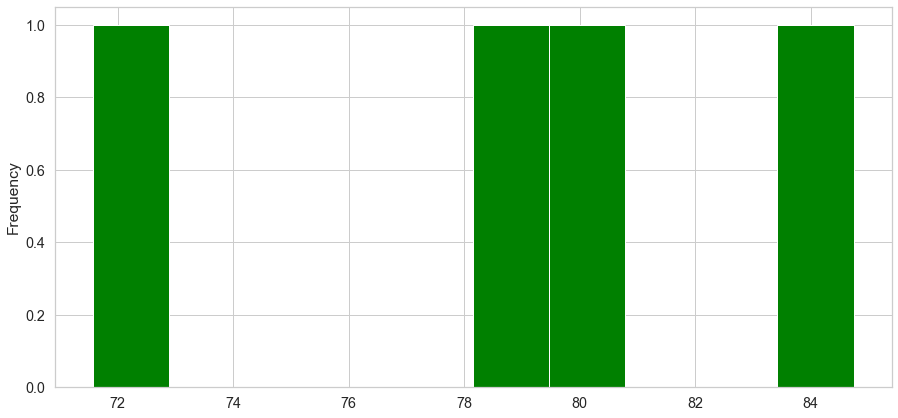

In [26]:
data.groupby(['year'])['PM2.5'].mean().plot(kind = 'hist', color = 'green', figsize = (15,7))

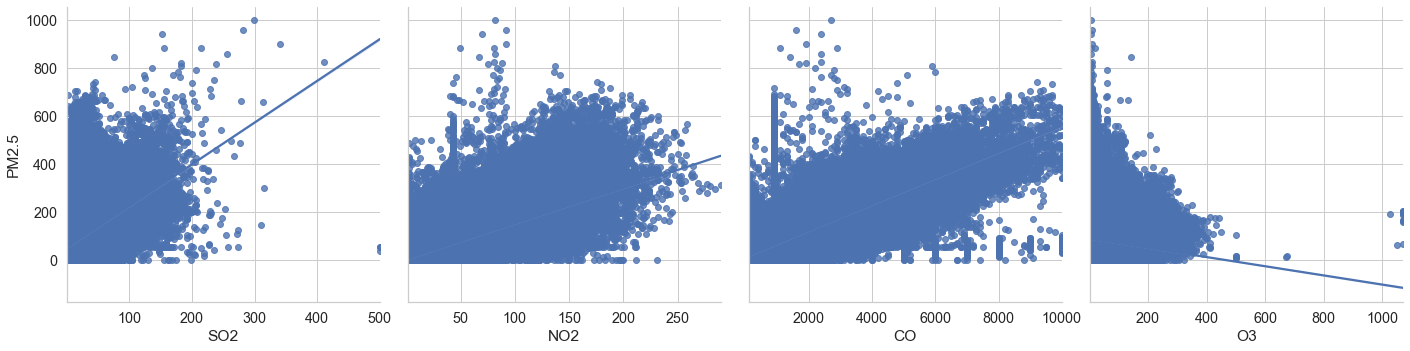

In [27]:
sns.pairplot(data, x_vars=['SO2','NO2','CO','O3'], y_vars='PM2.5', size=5, aspect=1, kind='reg')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    403776 non-null  float64
 6   PM10     403776 non-null  float64
 7   SO2      403776 non-null  float64
 8   NO2      403776 non-null  float64
 9   CO       403776 non-null  float64
 10  O3       403776 non-null  float64
 11  TEMP     403776 non-null  float64
 12  PRES     403776 non-null  float64
 13  DEWP     403776 non-null  float64
 14  RAIN     403776 non-null  float64
 15  WSPM     403776 non-null  float64
 16  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(1)
memory usage: 52.4+ MB


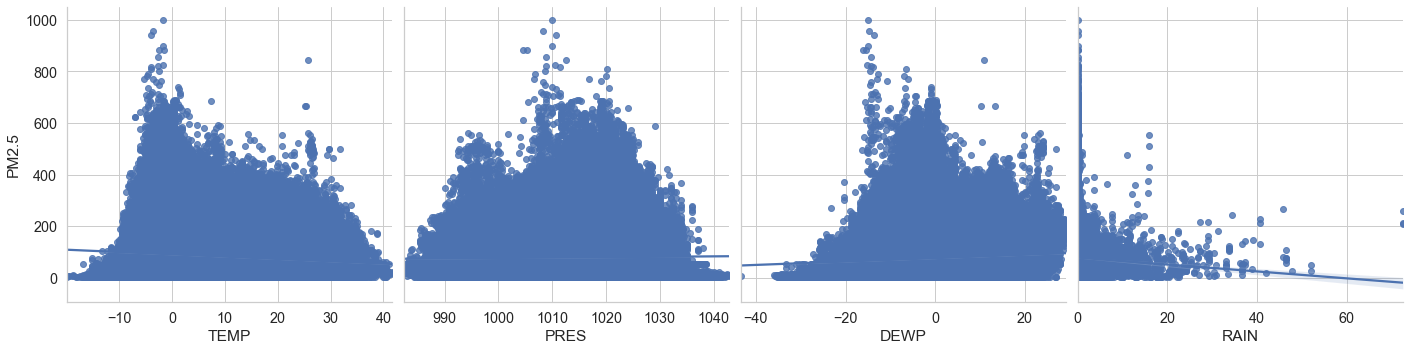

In [28]:
sns.pairplot(data, x_vars=['TEMP','PRES','DEWP','RAIN'], y_vars='PM2.5', size=5, aspect=1, kind='reg')

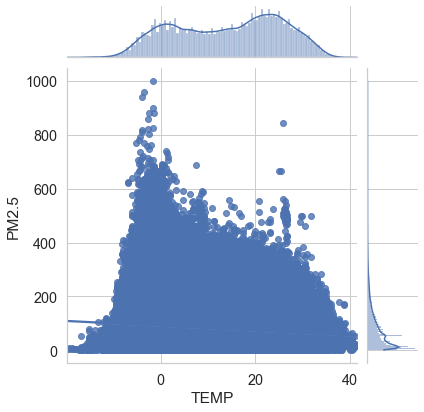

In [29]:
JG1 = sns.jointplot("TEMP", "PM2.5", data=data, kind='reg')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    403776 non-null  float64
 6   PM10     403776 non-null  float64
 7   SO2      403776 non-null  float64
 8   NO2      403776 non-null  float64
 9   CO       403776 non-null  float64
 10  O3       403776 non-null  float64
 11  TEMP     403776 non-null  float64
 12  PRES     403776 non-null  float64
 13  DEWP     403776 non-null  float64
 14  RAIN     403776 non-null  float64
 15  WSPM     403776 non-null  float64
 16  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(1)
memory usage: 52.4+ MB


In [31]:
data.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,Aotizhongxin


<AxesSubplot:ylabel='year'>

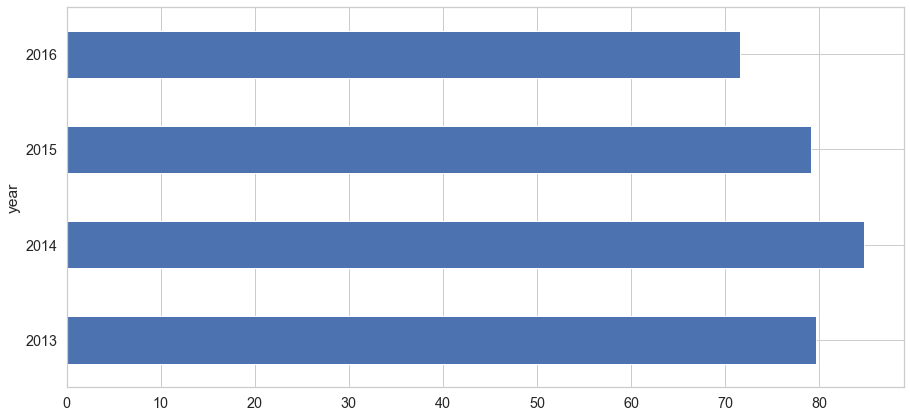

In [32]:
data.groupby(['year'])['PM2.5'].mean().plot(kind='barh', figsize=(15,7))

<AxesSubplot:xlabel='hour'>

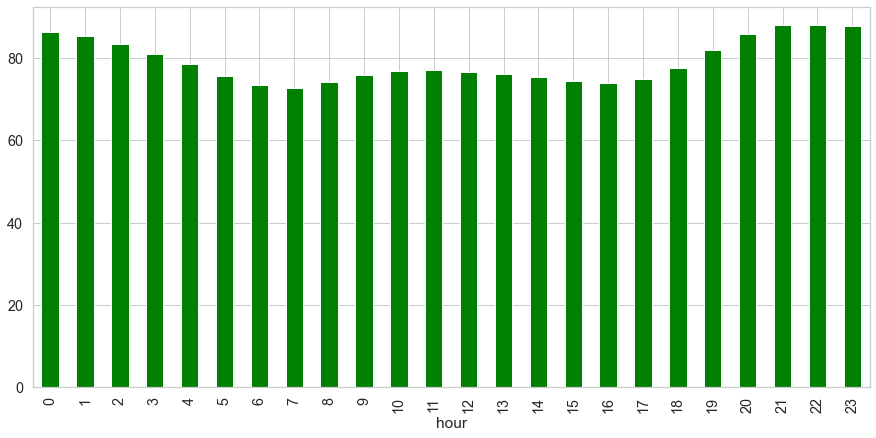

In [42]:
data.groupby(['hour'])['PM2.5'].mean().plot(kind='bar', figsize=(15,7), color = 'green')

In [33]:
data

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403771,33644,2016,12,31,19,449.0,487.0,10.0,153.0,4500.0,4.0,-1.9,1022.0,-6.1,0.0,0.9,Wanshouxigong
403772,33645,2016,12,31,20,460.0,492.0,12.0,146.0,4100.0,4.0,-2.5,1022.4,-5.5,0.0,0.7,Wanshouxigong
403773,33646,2016,12,31,21,463.0,498.0,12.0,141.0,4400.0,5.0,-3.0,1022.1,-5.3,0.0,0.9,Wanshouxigong
403774,33647,2016,12,31,22,493.0,537.0,12.0,124.0,5000.0,8.0,-3.0,1022.7,-5.0,0.0,0.1,Wanshouxigong


In [68]:
data.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,Aotizhongxin


In [78]:
data.drop(['year','month','day','hour'], axis = 1, inplace=True)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)

In [80]:
data1

array([[-0.9534452 , -1.11758865, -0.53590935, ..., -1.61172579,
        -0.08001726,  2.16581929],
       [-0.90241743, -1.07288476, -0.53590935, ..., -1.56767588,
        -0.08001726,  2.40813195],
       [-0.91517437, -1.08406073, -0.48948313, ..., -1.56767588,
        -0.08001726,  3.13506995],
       ...,
       [ 4.9019914 ,  4.40334099, -0.16449962, ..., -0.62060288,
        -0.08001726, -0.66116182],
       [ 5.28469967,  4.83920385, -0.16449962, ..., -0.59857793,
        -0.08001726, -1.30732893],
       [ 4.91474834,  4.31393322, -0.35020448, ..., -0.64996949,
        -0.08001726, -0.66116182]])

In [81]:
data_st = pd.DataFrame(data1)
data_st.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.953445,-1.117589,-0.535909,-1.258370,-0.818901,0.334502,-1.307970,1.227708,-1.611726,-0.080017,2.165819
1,-0.902417,-1.072885,-0.535909,-1.258370,-0.818901,0.334502,-1.343354,1.247020,-1.567676,-0.080017,2.408132
2,-0.915174,-1.084061,-0.489483,-1.170856,-0.818901,0.263635,-1.343354,1.275988,-1.567676,-0.080017,3.135070
3,-0.927931,-1.095237,-0.210926,-1.141684,-0.818901,0.245919,-1.369893,1.372547,-1.655776,-0.080017,1.115798
4,-0.966202,-1.128765,-0.164500,-1.112512,-0.818901,0.245919,-1.422970,1.440139,-1.663117,-0.080017,0.227318


In [82]:
data_st.shape

(403776, 11)

In [83]:
data_st.columns=['PM2.5','PM10', 'SO2','NO2','CO', 'O3','TEMP','PRES','DEWP','RAIN','WSPM']

In [84]:
data_st.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,-0.953445,-1.117589,-0.535909,-1.258370,-0.818901,0.334502,-1.307970,1.227708,-1.611726,-0.080017,2.165819
1,-0.902417,-1.072885,-0.535909,-1.258370,-0.818901,0.334502,-1.343354,1.247020,-1.567676,-0.080017,2.408132
2,-0.915174,-1.084061,-0.489483,-1.170856,-0.818901,0.263635,-1.343354,1.275988,-1.567676,-0.080017,3.135070
3,-0.927931,-1.095237,-0.210926,-1.141684,-0.818901,0.245919,-1.369893,1.372547,-1.655776,-0.080017,1.115798
4,-0.966202,-1.128765,-0.164500,-1.112512,-0.818901,0.245919,-1.422970,1.440139,-1.663117,-0.080017,0.227318


In [85]:
X_train = data_st[['PM10', 'SO2','NO2','CO', 'O3','TEMP','PRES','DEWP','RAIN','WSPM']]

In [86]:
X_train

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,-1.117589,-0.535909,-1.258370,-0.818901,0.334502,-1.307970,1.227708,-1.611726,-0.080017,2.165819
1,-1.072885,-0.535909,-1.258370,-0.818901,0.334502,-1.343354,1.247020,-1.567676,-0.080017,2.408132
2,-1.084061,-0.489483,-1.170856,-0.818901,0.263635,-1.343354,1.275988,-1.567676,-0.080017,3.135070
3,-1.095237,-0.210926,-1.141684,-0.818901,0.245919,-1.369893,1.372547,-1.655776,-0.080017,1.115798
4,-1.128765,-0.164500,-1.112512,-0.818901,0.245919,-1.422970,1.440139,-1.663117,-0.080017,0.227318
...,...,...,...,...,...,...,...,...,...,...
403771,4.280405,-0.257352,3.000683,3.006698,-0.958811,-1.414123,1.131149,-0.679336,-0.080017,-0.661162
403772,4.336285,-0.164500,2.796482,2.642355,-0.958811,-1.467200,1.169773,-0.635286,-0.080017,-0.822704
403773,4.403341,-0.164500,2.650624,2.915612,-0.941095,-1.511431,1.140805,-0.620603,-0.080017,-0.661162
403774,4.839204,-0.164500,2.154707,3.462126,-0.887945,-1.511431,1.198740,-0.598578,-0.080017,-1.307329


In [87]:
Y_train = data_st[['PM2.5']]

In [88]:
Y_train

,PM2.5
0,-0.953445
1,-0.902417
2,-0.915174
3,-0.927931
4,-0.966202
...,...
403771,4.723394
403772,4.863721
403773,4.901991
403774,5.284700


In [89]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train) 

LinearRegression()

In [90]:
y_pred_train = lr_model.predict(X_train) 

In [91]:
y_pred_train

array([[-1.09576645],
       [-1.05037424],
       [-1.05841462],
       ...,
       [ 3.68672197],
       [ 4.10310033],
       [ 3.84926398]])

In [92]:
from sklearn import metrics
MAE_train_st = metrics.mean_absolute_error(Y_train, y_pred_train)
MAE_train_st

0.2645569688444661

In [93]:
RMSE_train_st = np.sqrt( metrics.mean_squared_error(Y_train, y_pred_train))
RMSE_train_st

0.40681672753756015

In [95]:
x_test = pd.read_csv ("C:\\Users\\proti\\Downloads\\Beijing-Air\\beijing_test.csv")
x_test.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
1,33650,2017,1,1,1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
2,33651,2017,1,1,2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
3,33652,2017,1,1,3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
4,33653,2017,1,1,4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin


In [96]:
x_test.drop (['REF_NO','wd','station','year','month','day','hour'], axis =1, inplace = True)

In [97]:
x_test.head()

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,1.0
1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,0.7
2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,1.1
3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,1.1
4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,1.0


In [101]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler().fit(x_test)
data1 = scaler1.transform(x_test)
x_test_sc= scaler1.transform(x_test)
x_test.head()

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,1.0
1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,0.7
2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,1.1
3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,1.1
4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,1.0


In [102]:
y_pred_test= lr_model.predict(x_test) 
y_pred_test

array([[1976.91484418],
       [2030.27228928],
       [1986.22690966],
       ...,
       [ 196.22256257],
       [ 166.86157292],
       [ 216.46004103]])

In [108]:
df_output = pd.DataFrame(y_pred_test, columns = ['PM2.5'])
df_output

,PM2.5
0,1976.914844
1,2030.272289
2,1986.226910
3,1879.088724
4,2384.531562
...,...
16723,171.916971
16724,197.865052
16725,196.222563
16726,166.861573


In [110]:
df_output.shape

(16728, 1)

In [111]:
file_name = 'Output.xlsx'
df_output.to_excel(file_name)

In [113]:
df_output.to_csv('submission.csv', index=False, header=False)

In [114]:
from sklearn import metrics
MAE_test_st = metrics.mean_absolute_error(y_test, y_pred_test)
MAE_test_st ## Since y_test that is values of PM2.5 is not mentioned, we are not able to compare y_test and y_pred_test.

NameError: name 'y_test' is not defined

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   REF_NO  403776 non-null  int64  
 1   year    403776 non-null  int64  
 2   month   403776 non-null  int64  
 3   day     403776 non-null  int64  
 4   hour    403776 non-null  int64  
 5   PM2.5   403776 non-null  float64
 6   PM10    403776 non-null  float64
 7   SO2     403776 non-null  float64
 8   NO2     403776 non-null  float64
 9   CO      403776 non-null  float64
 10  O3      403776 non-null  float64
 11  TEMP    403776 non-null  float64
 12  PRES    403776 non-null  float64
 13  DEWP    403776 non-null  float64
 14  RAIN    403776 non-null  float64
 15  WSPM    403776 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 49.3 MB


In [3]:
data_new = pd.read_csv ("C:\\Users\\Avinab\\Desktop\\Saranya\\Python Notebooks\\Beijing-Air\\beijing_train.csv")
data_new.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
data_new['wd'].nunique()

16

In [5]:
data_new['station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [13]:
cat_cols = ['station','wd']

In [14]:
data_with_dummies = pd.get_dummies(data_new, columns=cat_cols, drop_first=True)
data_with_dummies.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,1,0,0,0,0,0,0,0,0,0
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,1,0,0,0,0,0,0,0,0,0
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,0,1,0,0,0,0,0,0,0,0
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data_with_dummies.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'station_Changping',
       'station_Dingling', 'station_Dongsi', 'station_Guanyuan',
       'station_Gucheng', 'station_Huairou', 'station_Nongzhanguan',
       'station_Shunyi', 'station_Tiantan', 'station_Wanliu',
       'station_Wanshouxigong', 'wd_ENE', 'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE',
       'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE', 'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W',
       'wd_WNW', 'wd_WSW'],
      dtype='object')

In [16]:
data_with_dummies.drop(['REF_NO'], axis=1, inplace = True)

In [17]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   403776 non-null  int64  
 1   month                  403776 non-null  int64  
 2   day                    403776 non-null  int64  
 3   hour                   403776 non-null  int64  
 4   PM2.5                  395301 non-null  float64
 5   PM10                   397554 non-null  float64
 6   SO2                    395000 non-null  float64
 7   NO2                    391917 non-null  float64
 8   CO                     383515 non-null  float64
 9   O3                     390769 non-null  float64
 10  TEMP                   403512 non-null  float64
 11  PRES                   403511 non-null  float64
 12  DEWP                   403507 non-null  float64
 13  RAIN                   403515 non-null  float64
 14  WSPM                   403538 non-nu

In [10]:
data_with_dummies['PM2.5'] = data_with_dummies['PM2.5'].fillna(data_with_dummies['PM2.5'].median())
data_with_dummies['PM10'] = data_with_dummies['PM10'].fillna(data_with_dummies['PM10'].median())
data_with_dummies['SO2'] = data_with_dummies['SO2'].fillna(data_with_dummies['SO2'].median())
data_with_dummies['NO2'] = data_with_dummies['NO2'].fillna(data_with_dummies['NO2'].median())
data_with_dummies['CO'] = data_with_dummies['CO'].fillna(data_with_dummies['CO'].median())
data_with_dummies['O3'] = data_with_dummies['O3'].fillna(data_with_dummies['O3'].median())
data_with_dummies['TEMP'].interpolate(method='linear', direction = 'forward', inplace=True) 
data_with_dummies['PRES'].interpolate(method='linear', direction = 'forward', inplace=True) 
data_with_dummies['RAIN'].interpolate(method='linear', direction = 'forward', inplace=True) 
data_with_dummies['WSPM'].interpolate(method='linear', direction = 'forward', inplace=True) 
data_with_dummies['DEWP'].interpolate(method='linear', direction = 'forward', inplace=True) 


In [18]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   403776 non-null  int64  
 1   month                  403776 non-null  int64  
 2   day                    403776 non-null  int64  
 3   hour                   403776 non-null  int64  
 4   PM2.5                  395301 non-null  float64
 5   PM10                   397554 non-null  float64
 6   SO2                    395000 non-null  float64
 7   NO2                    391917 non-null  float64
 8   CO                     383515 non-null  float64
 9   O3                     390769 non-null  float64
 10  TEMP                   403512 non-null  float64
 11  PRES                   403511 non-null  float64
 12  DEWP                   403507 non-null  float64
 13  RAIN                   403515 non-null  float64
 14  WSPM                   403538 non-nu

In [11]:
feature_cols = [ 'CO', 'NO2','O3', 'SO2','DEWP','PRES','PM10', 'RAIN','WSPM','wd_ENE','wd_ESE','wd_N','wd_NE','wd_NNE','wd_NNW','wd_NW','wd_S','wd_SE','wd_SSE','wd_SSW','wd_SW','wd_W','wd_WNW']  # create a Python list of feature names
x = data_with_dummies[feature_cols]  
y = data_with_dummies['PM2.5']
lr_model_cat = LinearRegression()

KeyError: "['wd', 'station'] not in index"

In [248]:
lr_model_cat.fit(x,y)

LinearRegression()

In [249]:
y_pred_cat = lr_model_cat.predict(x)


In [250]:
pd.DataFrame((lr_model_cat.coef_).T,index=x.columns,\
             columns=['Co-efficients']).sort_values('Co-efficients',ascending=False)

,Co-efficients
DEWP,1.030676
PRES,0.770634
PM10,0.547697
year,0.285596
SO2,0.152609
NO2,0.054671
O3,0.028841
CO,0.021544
day,-0.135631
month,-0.427305


In [253]:
from sklearn import metrics
MAE_train_st1 = metrics.mean_absolute_error(y, y_pred_cat)
MAE_train_st1

20.83116802584642